![](img/%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8.jpg)

我们将常见的场景分为5大类：  
1）展示趋势变化（Evolution）   
2）展示分布关系（Distribution）  
3）展示相关关系（Correlation）  
4）展示排序信息（Ranking）  
5）展示组成关系（Part of a whole）

### 展示趋势变化（Evolution）

简单折线图

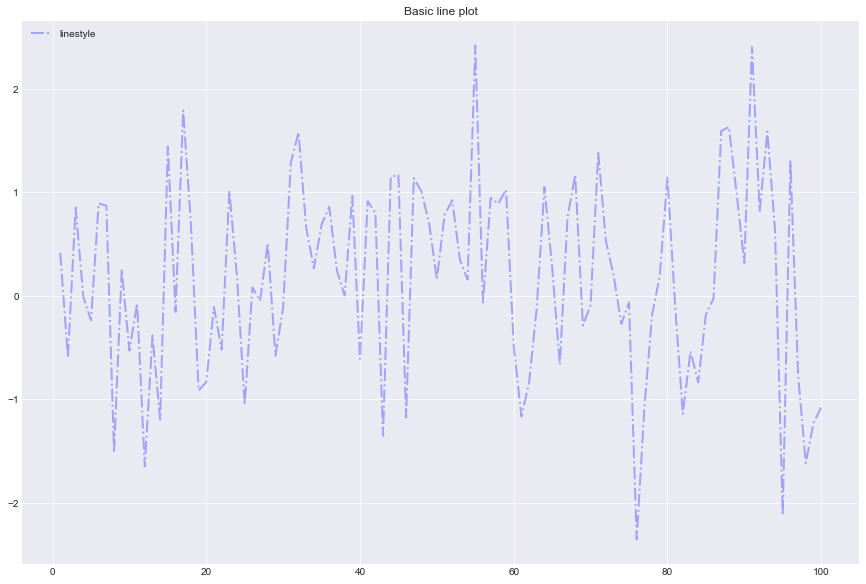

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 创建数据，分别对应X轴和Y轴，注意X轴要是有序排列的
df=pd.DataFrame({'xdata': range(1,101), 'ydata': np.random.randn(100) })
# 绘图
plt.style.use('seaborn-darkgrid') # 也可以选择其他的风格式样 seaborn-whitegrid
plt.figure(figsize=(15, 10)) # 设置画布大小
# color： 控制线条颜色，red/skyblue/blue 等
# alpha： 控制线条透明度
# linestyle：控制线条式样，'--'， '-'， '-.'， ':' 等
# linewidth：控制线条粗细大小
plt.plot( 'xdata', 'ydata', data=df, color='blue',alpha=0.3, linestyle='-.',
linewidth=2, label='linestyle')
plt.legend(loc='upper left', frameon=False) # 设置标签
plt.title('Basic line plot') # 设置标题
plt.show()


突出某一重点的多线图

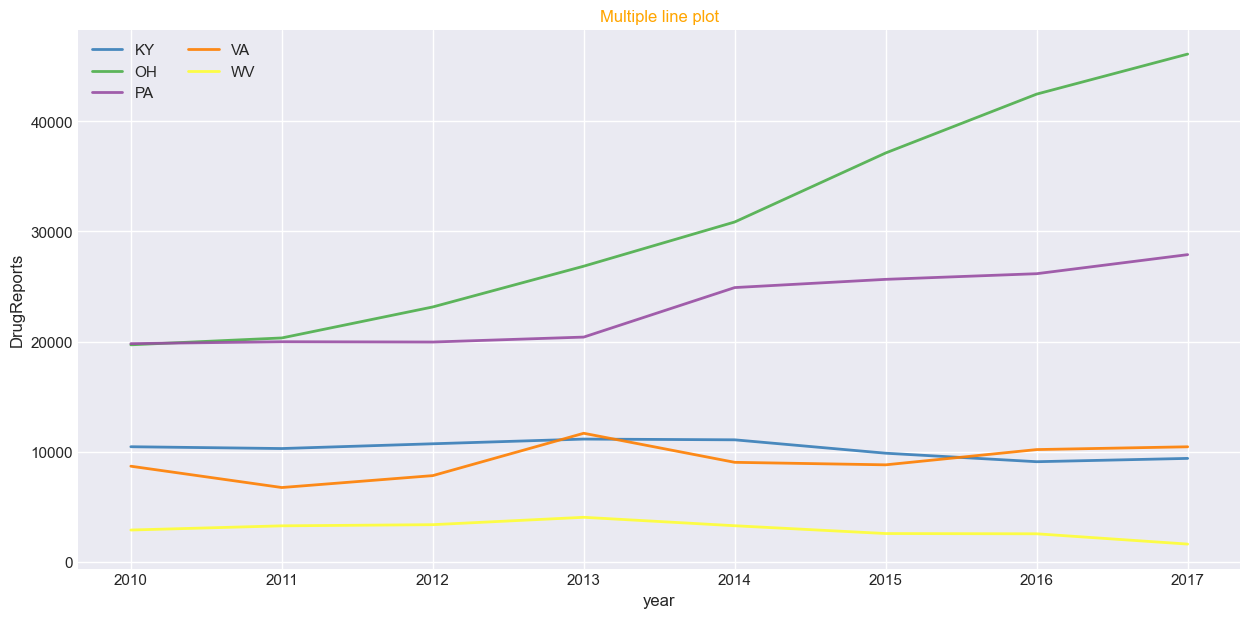

In [21]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()

# 设定式样
plt.style.use('seaborn-darkgrid')
# 创建调色板， 色卡用来控制每条线的颜色
palette = plt.get_cmap('Set1')
# 绘图
plt.figure(figsize=(15, 7))
num=0
for column in df.drop('YYYY', axis=1):
    num += 1
    plt.plot(df['YYYY'], df[column], marker='', color=palette(num), linewidth=2,
alpha=0.9, label=column)
plt.legend(loc=2, ncol=2)
plt.title("Multiple line plot", loc='center', fontsize=12, fontweight=0,
color='orange')
plt.xlabel("year")
plt.ylabel("DrugReports")
plt.show()

Text(0, 0.5, 'DrugReports')

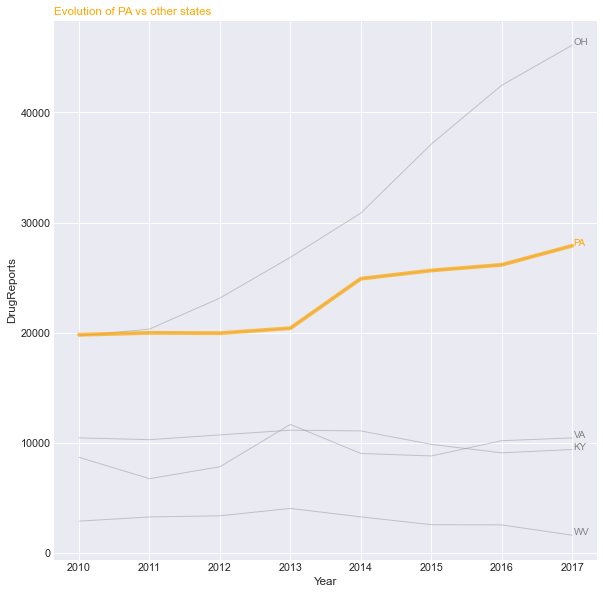

In [22]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()
# 设定式样
plt.style.use('seaborn-darkgrid')
# 绘图
plt.figure(figsize=(10, 10), dpi=70)

# 所有的线条都画成灰色
for column in df.drop('YYYY', axis=1):
        plt.plot(df['YYYY'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
# PA的特殊处理，用橘色且加粗
plt.plot(df['YYYY'], df['PA'], marker='', color='orange', linewidth=4, alpha=0.7)
# 设定每条线的label的位置，其他的都为灰色，PA的为橘色
num=0
for i in df.values[7][1:]:
    num+=1
    name=list(df)[num]
    if name != 'PA':
        plt.text(2017.02, i, name, horizontalalignment='left', size='small',
color='grey')
# 特殊处理PA
plt.text(2017.02, df.PA.tail(1), 'PA', horizontalalignment='left', size='small',
color='orange')
# 添加图的标题和XY轴的标签
plt.title("Evolution of PA vs other states", loc='left', fontsize=12, fontweight=0,
color='orange')
plt.xlabel("Year")
plt.ylabel("DrugReports")

多子图

Text(1998, 60000, 'DrugReports')

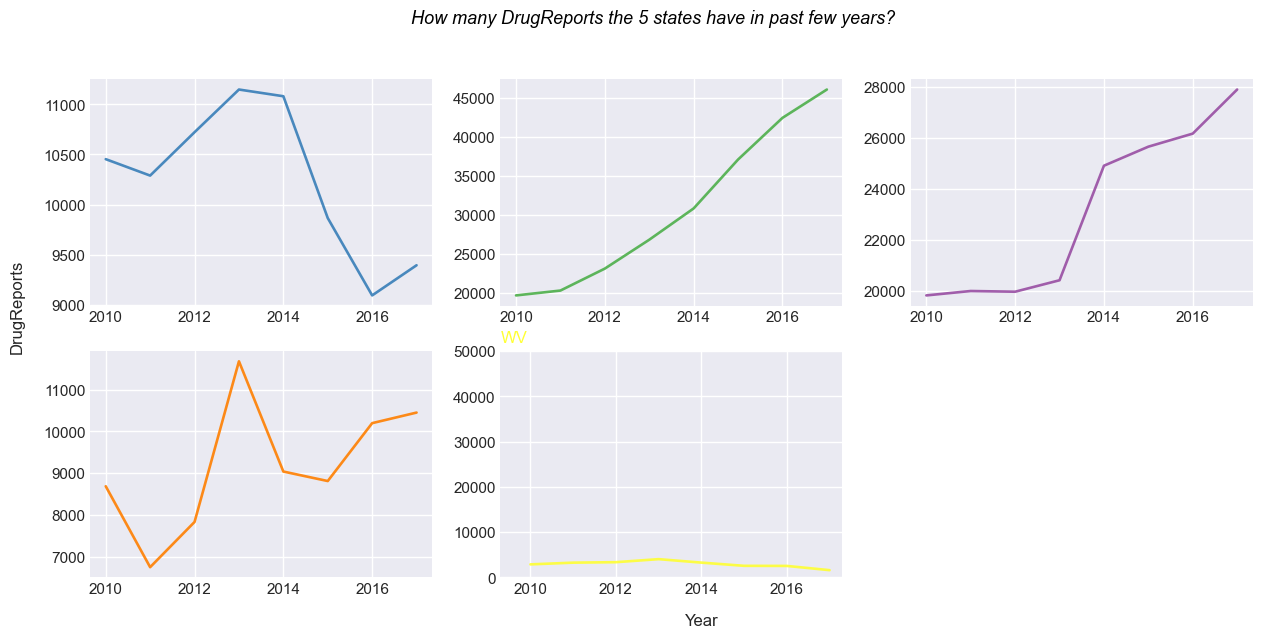

In [23]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()
# 初始化画布的设定
plt.style.use('seaborn-darkgrid') # 风格
palette = plt.get_cmap('Set1') # 颜色卡
plt.figure(figsize=(15, 10)) # 画布大小
# 绘制
num=0
for column in df.drop('YYYY', axis=1):
    num+=1
    # 设定子图在画布的位置
    plt.subplot(3,3, num)
    # 画线图
    plt.plot(df['YYYY'], df[column], marker='', color=palette(num), linewidth=1.9,
    alpha=0.9, label=column)
    # 设定子图的X轴和Y轴的范围，注意，这里所有的子图都是用同一套X轴和Y轴
plt.xlim(2009.3,2017.3)
plt.ylim(0,50000)
# 添加每个子图的标题
plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
# 添加整个画布的标题
plt.suptitle("How many DrugReports the 5 states have in past few years?", fontsize=13,
fontweight=0, color='black', style='italic', y=0.95)
# 添加整个画布的横纵坐标的名称
plt.text(2014, -9500, 'Year', ha='center', va='center')
plt.text(1998, 60000, 'DrugReports', ha='center', va='center', rotation='vertical')

面积图 - Area chart

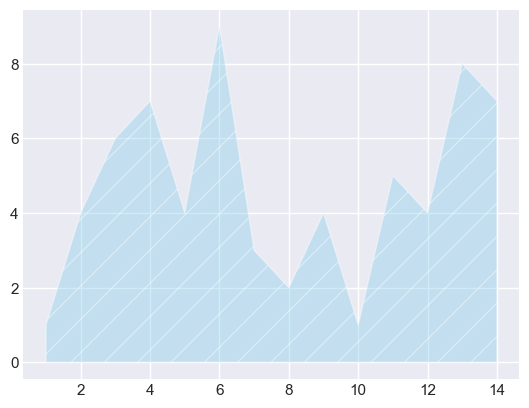

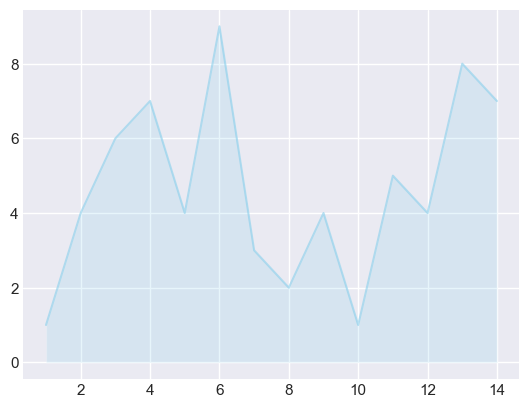

In [24]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
# 创建数据
x=range(1,15)
y=[1,4,6,7,4,9,3,2,4,1,5,4,8,7]
# 绘图
# facecolor：控制填充颜色，red/skyblue/blue 等
# alpha： 控制填充透明度
# hatch: 控制阴影式样{'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
plt.fill_between( x, y, facecolor="skyblue", alpha=0.4, hatch='/')
plt.show()
# 在填充的基础上，添加一条折线，图形更加清晰
plt.fill_between( x, y, facecolor="skyblue", alpha=0.2)
plt.plot(x, y, color="skyblue", alpha=0.6, linewidth=1.5) # 线的更多设置可以参考 line plot
plt.show()

堆积面积图 - Stacked area chart

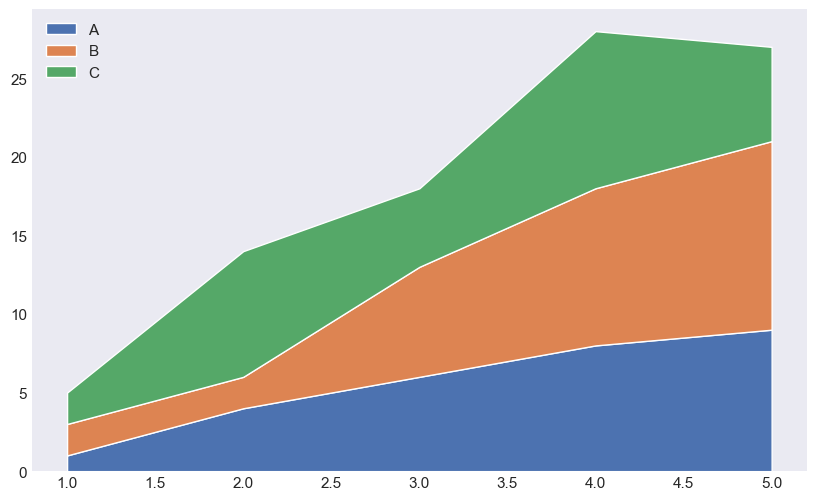

In [25]:
# library
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark') # 风格
plt.figure(figsize=(10, 6)) # 画布大小
# 方式一， y由三个序列组成
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
# 绘图
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()

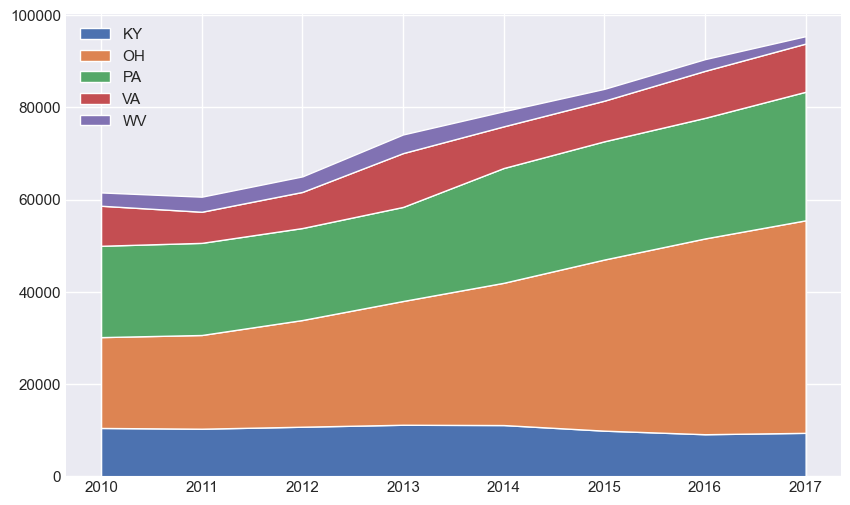

In [26]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 导入数据集并转成方便作图的格式
Dataset = pd.read_csv('data/Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()
plt.style.use('seaborn-darkgrid') # 风格
plt.figure(figsize=(10, 6)) # 画布大小
plt.stackplot(df['YYYY'],df['KY'],df['OH'],df['PA'],df['VA'],df['WV'],
labels=df.iloc[:, 1:6].columns)
plt.legend(loc='upper left')
plt.show()

### 展示分布关系（Distribution）

小提琴图 - Violin plot

In [ ]:
import seaborn as sns
df = pd.read_csv('data/iris.csv')
#根据分类变量分组绘制一个纵向的小提琴图：
sns.violinplot( x=df['species'],y=df["sepal_length"],inner='quartile' )#x代表不同的类别特
#征，y代表连续特征,inner代表在小提琴图中显示四分位数线

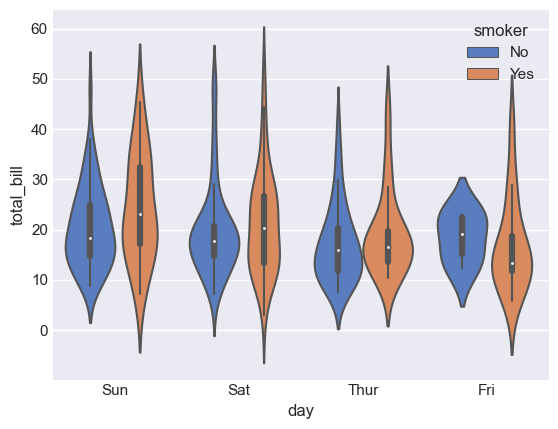

In [28]:
tips = pd.read_csv('data/tips.csv')
#根据2个分类变量嵌套分组绘制一个小提琴图
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted")

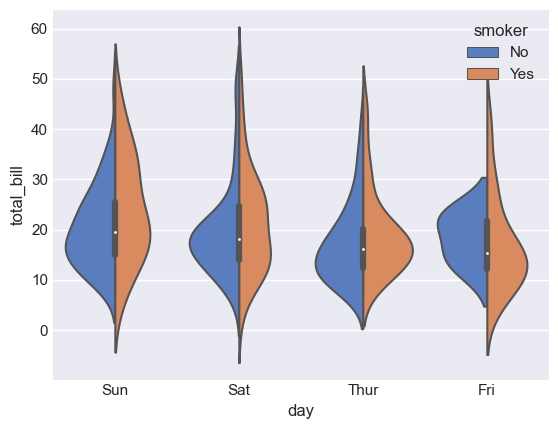

In [29]:
#绘制分割的小提琴图以比较不同的色调变量
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted",
split=True)

箱型图 - Box plot

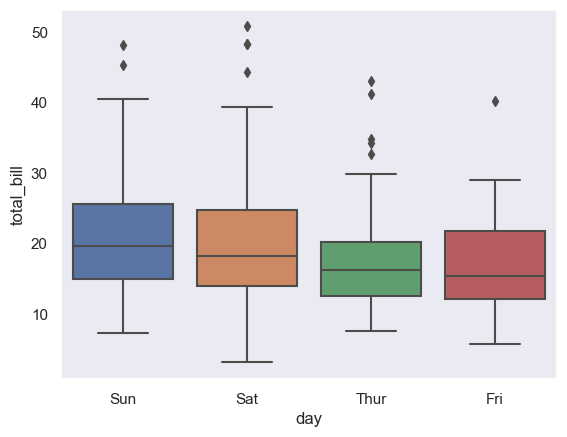

In [30]:
import seaborn as sns
sns.set(style="dark")
tips = pd.read_csv('data/tips.csv')
#根据分类变量分组绘制一个纵向的箱型图
ax = sns.boxplot(x="day", y="total_bill", data=tips)

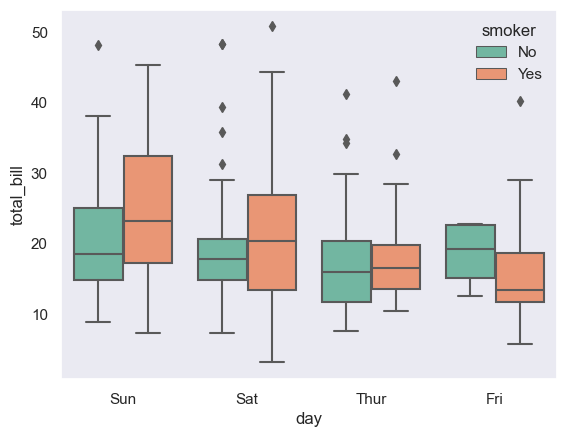

In [31]:
# 根据2个分类变量嵌套分组绘制一个箱型图
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set2")

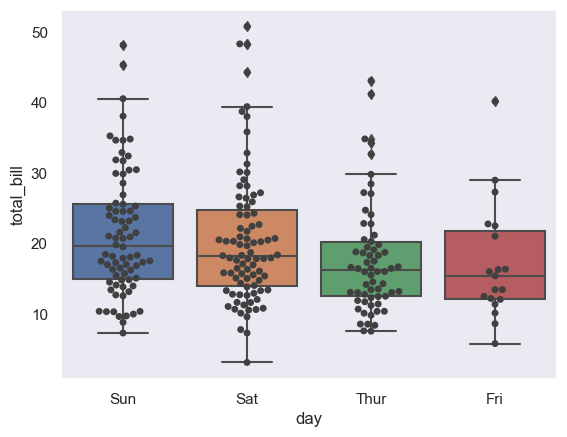

In [32]:
# 使用 swarmplot() 展示箱型图顶部的数据点
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

直方图（HIstogram）

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targe

<AxesSubplot:ylabel='Probability'>

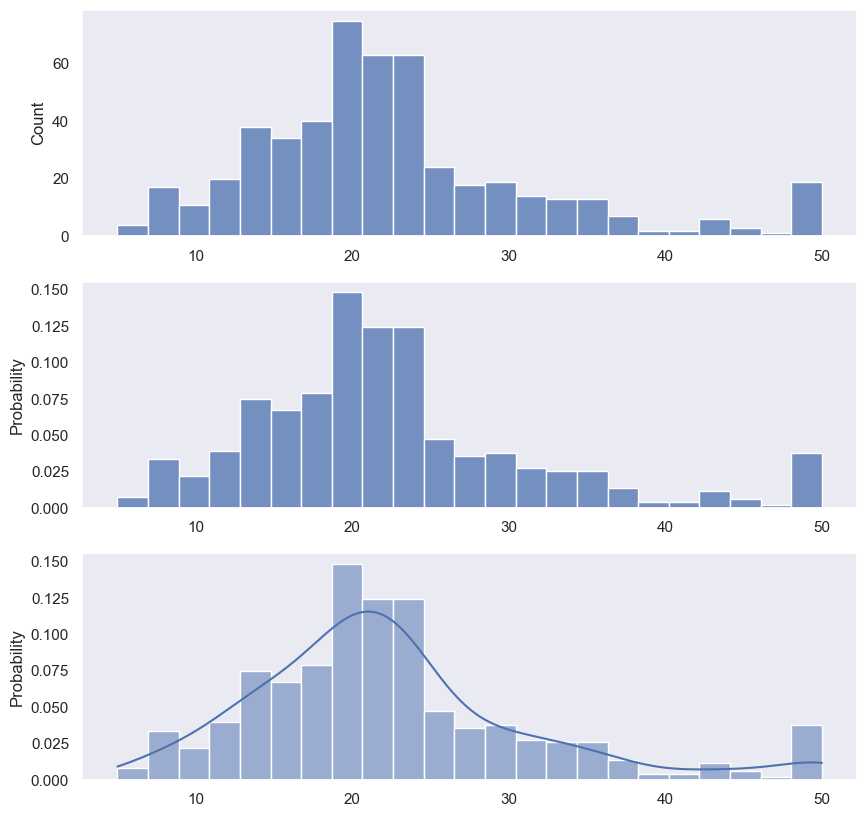

In [33]:
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()
y = boston['target']
f, axs = plt.subplots(3,1,figsize=(10,10))
# 计数标准直方图
sns.histplot(y,stat='count',ax=axs[0])
# 归一化的直方图
sns.histplot(y,stat='probability',ax=axs[1])
# 在直方图上同时画出密度曲线
sns.histplot(y,stat='probability',kde=True,ax=axs[2])

密度图（Density）

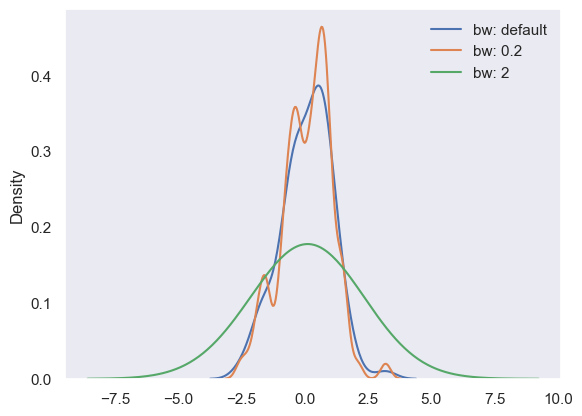

In [34]:
#kdeplot()中的bw参数控制着估计值与真实数据之间的贴近程度
#它与我们的KDE图的宽度相关。它提供了默认的规则来确定一个取值
x = np.random.normal(size=100)
sns.kdeplot(x, label="bw: default")
sns.kdeplot(x, bw_method=0.2, label="bw: 0.2")
sns.kdeplot(x, bw_method=2, label="bw: 2")
plt.legend();

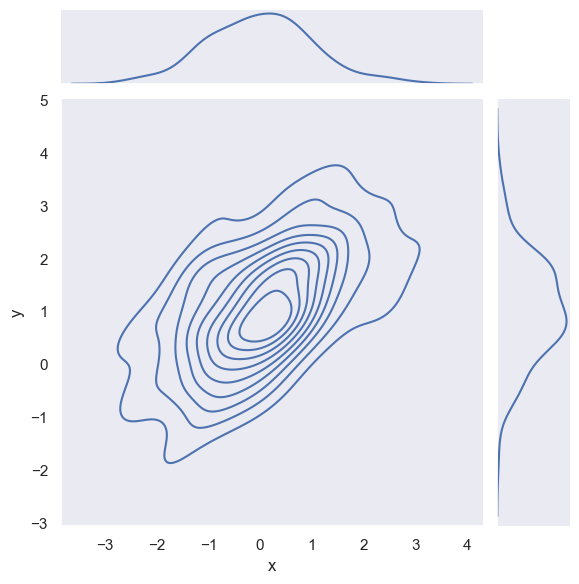

In [35]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
#核密度估计也适用于二元的情况。在seaborn中，这种图会以等高线的方式展示出来，我们可以用
        #jointplot(kind="kde")来绘制
sns.jointplot(x="x", y="y", data=df, kind="kde")

### 展示相关关系（Correlation）

散点图（Scatter plot）

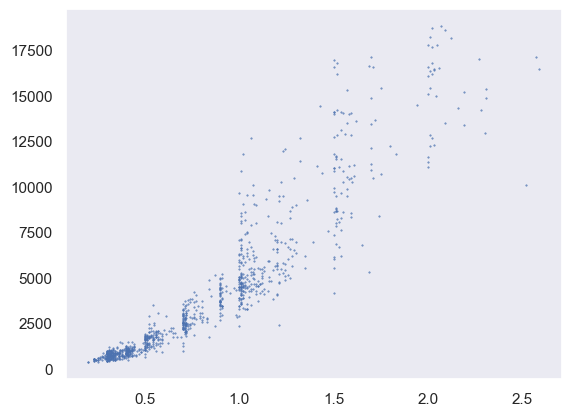

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('data\diamonds.csv').sample(1000)
# 绘制标准散点图
plt.scatter(df.carat, df.price, s=0.2)

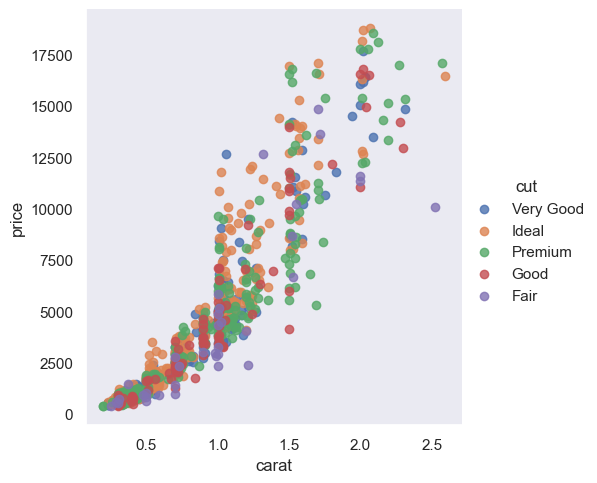

In [37]:
# 用颜色区别不同类别的散点
sns.lmplot(x='carat', y='price', data=df, hue='cut', fit_reg=False)

热力图（Heatmap）

<AxesSubplot:xlabel='clarity', ylabel='cut'>

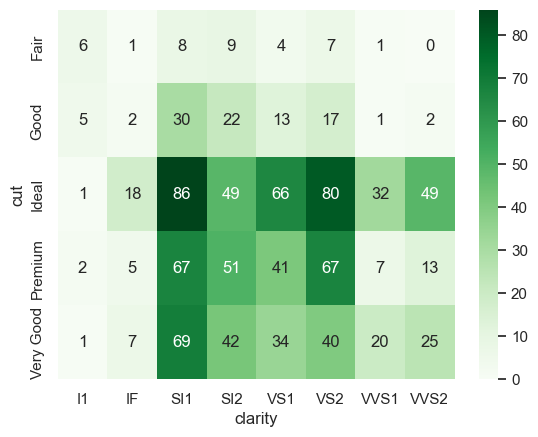

In [38]:
# 类别变量的统计
res = pd.crosstab(df.cut, df.clarity)
sns.heatmap(res, cmap='Greens', annot=True)

<AxesSubplot:xlabel='clarity', ylabel='price'>

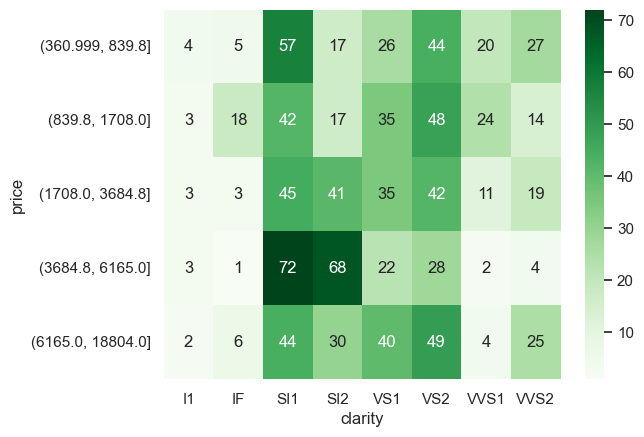

In [39]:
# 类别变量和数值变量分箱统计
res = pd.crosstab(pd.qcut(df.price, 5), df.clarity)
sns.heatmap(res, cmap='Greens', annot=True)

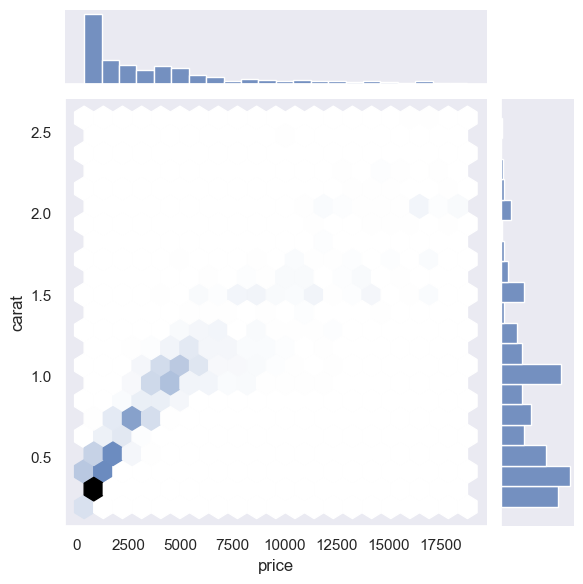

In [40]:
# 数值变量之间的密度图
sns.jointplot(x=df["price"], y=df["carat"], kind='hex')

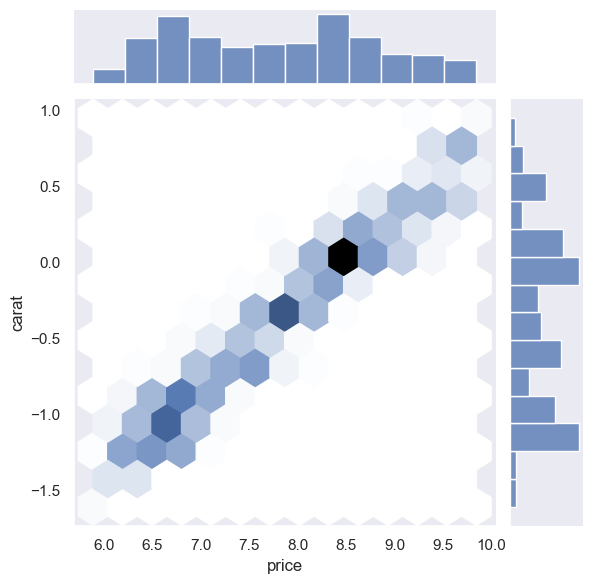

In [41]:
# 使用对数变换
sns.jointplot(x=np.log(df["price"]), y=np.log(df["carat"]), kind='hex')

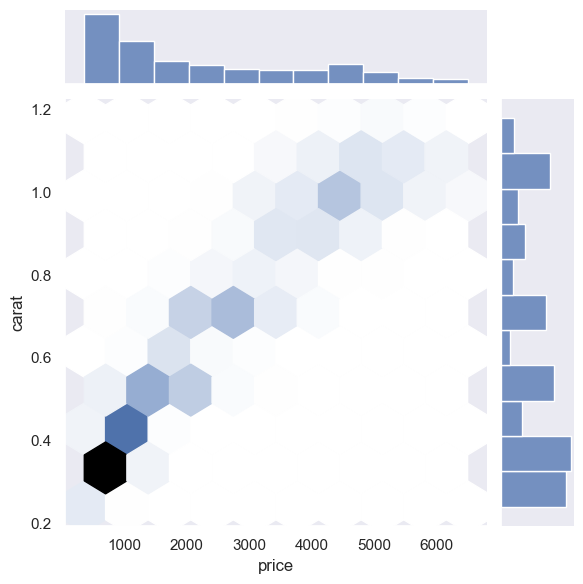

In [42]:
# 使用标准差截断
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.median()+1*s1.std()))|(s1<(s1.median()-s1.std())))
s2 = s2.mask((s2>(s2.median()+1*s2.std()))|(s2<(s2.median()-s2.std())))
sns.jointplot(x=s1, y=s2, kind='hex')

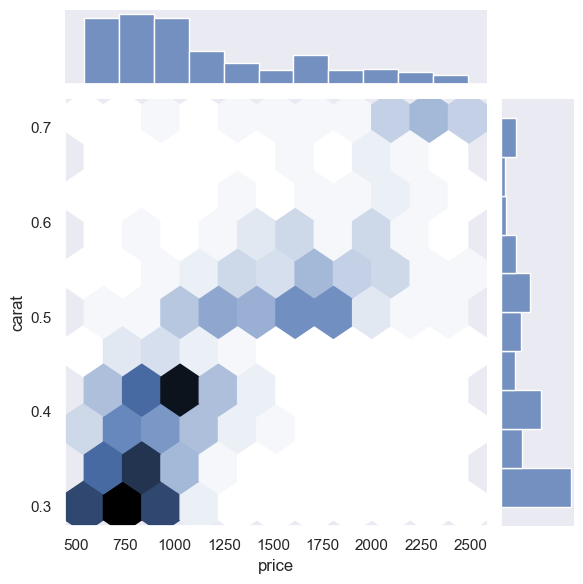

In [43]:
# 使用分位数截断
s1, s2 = df.price, df.carat
s1 = s1.mask((s1>(s1.quantile(0.5)))|(s1<(s1.quantile(0.05))))
s2 = s2.mask((s2>(s2.quantile(0.5)))|(s2<(s2.quantile(0.05))))
sns.jointplot(x=s1, y=s2, kind='hex')

气泡图（Bubble plot）

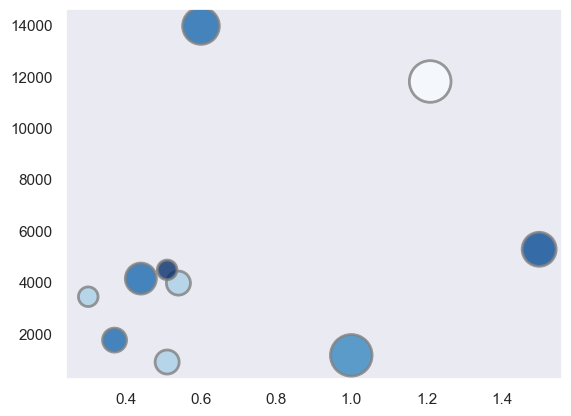

In [44]:
new_feature1 = np.random.randint(0, 10, 10) # 用气泡大小显示该feature大小
new_feature2 = np.random.randint(0, 10, 10) # 用气泡深浅显示该feature大小
plt.scatter(df.carat.sample(10), df.price.sample(10), s=new_feature1*100,
            c=new_feature2, cmap="Blues", alpha=0.8, edgecolors="grey", linewidth=2)

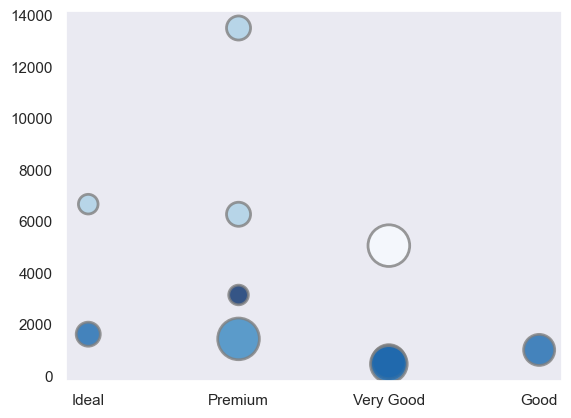

In [45]:
plt.scatter(df.cut.sample(10), df.price.sample(10), s=new_feature1*100,
c=new_feature2, cmap="Blues", alpha=0.8, edgecolors="grey", linewidth=2)

### 展示排序信息（Ranking）

柱状图 - Barplot

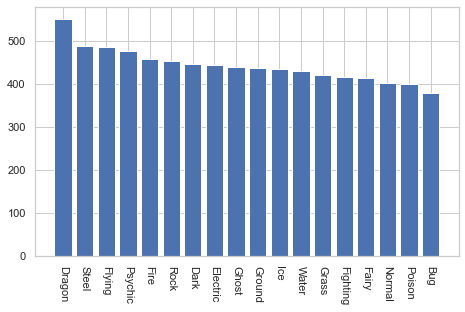

In [88]:
# 计算分类别的平均属性值
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pokemon = pd.read_csv('data/pokemon.csv')
data=pokemon.groupby('Type 1')['Total'].mean().sort_values(ascending=False).reset_index()
# 绘制柱状图
bars = data['Type 1']
pos = np.arange(len(bars))
plt.bar(pos, data['Total'])
plt.xticks(pos, bars,rotation=270)
plt.show()

雷达图 - Radar

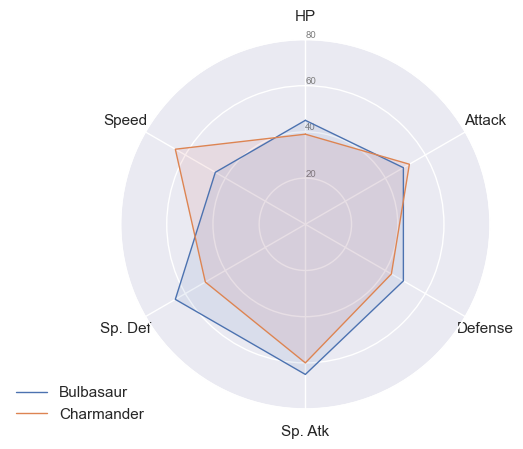

In [47]:
from math import pi
# 绘制背景，选择2只口袋妖怪，比较六维属性值
data = pokemon.loc[[0,4]]
categories=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
N=6
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)

plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=7)
plt.ylim(0,80)
# 分别添加两个变量的雷达曲线
values= data.loc[0, ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data.loc[0,'Name'])
ax.fill(angles, values, 'b', alpha=0.1)
values= data.loc[4, ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP']]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=data.loc[4,'Name'])
ax.fill(angles, values, 'r', alpha=0.1)
# 图例
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

平行坐标图 - Parallel coordinates

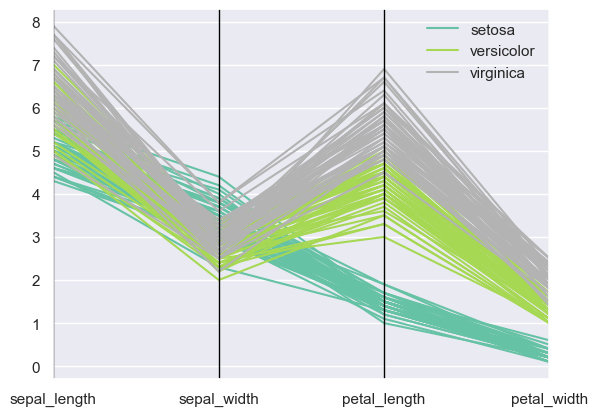

In [48]:
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
data =pd.read_csv('data/iris.csv')
# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()

棒棒糖图 - Lollipop

Text(0, 0.5, 'Type')

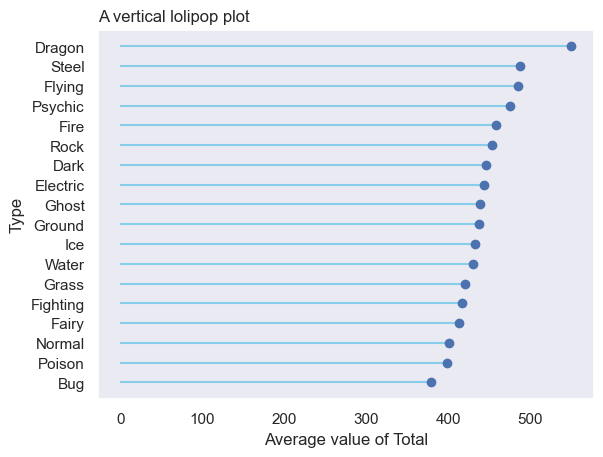

In [49]:
# 计算分类别的平均属性值
data=pokemon.groupby('Type 1')['Total'].mean().reset_index()
# 绘制棒棒糖图
data = data.sort_values(by='Total')
my_range=range(1,len(data.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=data['Total'], color='skyblue')
plt.plot(data['Total'], my_range, "o")
plt.yticks(my_range, data['Type 1'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Average value of Total')
plt.ylabel('Type')

圆形柱状图 - Circular barplot

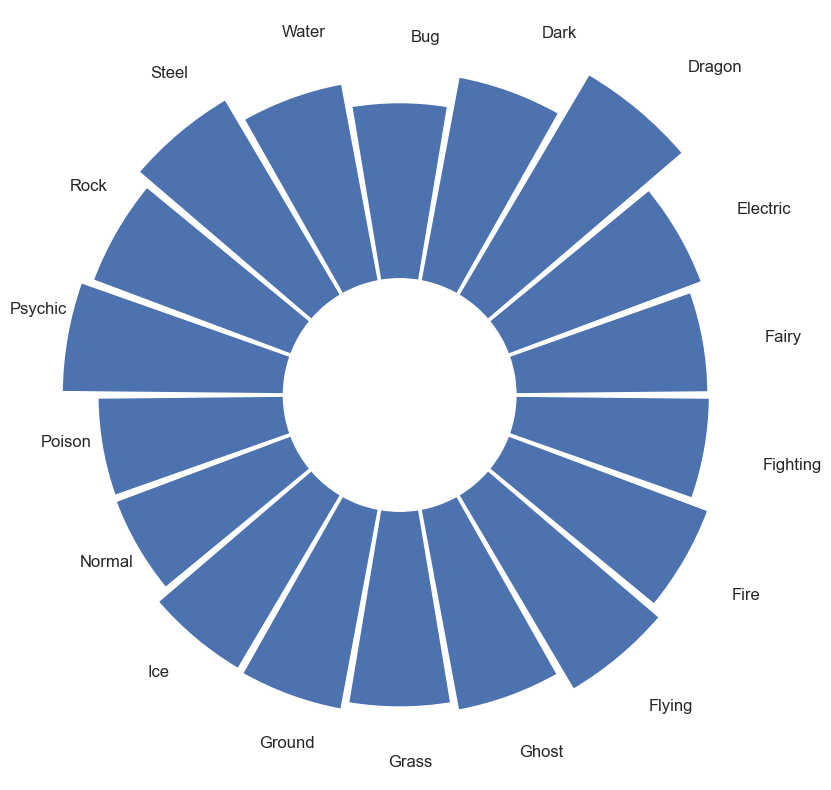

In [50]:
# 计算分类别的平均属性值
data=pokemon.groupby('Type 1')['Total'].mean().reset_index()
# 绘制圆形柱状图
N = len(data)
bottom = 250
value = data['Total']
theta = np.linspace(0.0, 2 * pi, N, endpoint=False)
width = (2*pi) / N-0.02
plt.figure(figsize = (16, 10))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, value, width=width, bottom=bottom)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ticks =data['Type 1']
for theta,tick,value in zip(theta,ticks,value):
    ax.text(theta+0.03, value+380,tick)
plt.axis('off')
plt.show()

### 展示组成关系（Part of a whole）

饼图 - Pie chart

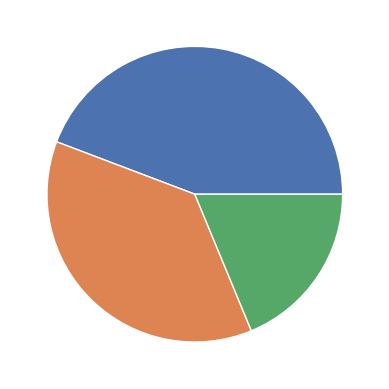

In [51]:
#绘制Pie chart
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots() # 1*1画布
size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]]) # 3*2 array

cmap = plt.get_cmap("tab20c") # Get a colormap instance, matplotlib.cm
outer_colors = cmap(np.arange(3)*4) # cmap([0,4,8]), len(cmap.colors) -> 20
inner_colors = cmap(np.array([1,2,5,6,9,10]))
# 第一个环
ax.pie(vals.sum(axis=1)) # wedge object 控制圆环的宽度
plt.show()

array([<AxesSubplot:ylabel='x'>], dtype=object)

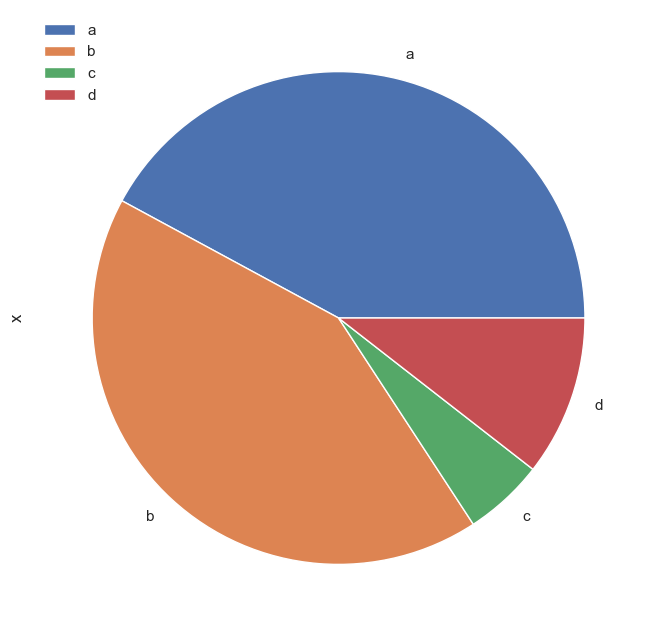

In [52]:
import pandas as pd
# --- dataset 1: just 4 values for 4 groups:
df = pd.DataFrame([8,8,1,2], index=['a', 'b', 'c', 'd'], columns=['x'])
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))

甜甜圈图 - Donut chart

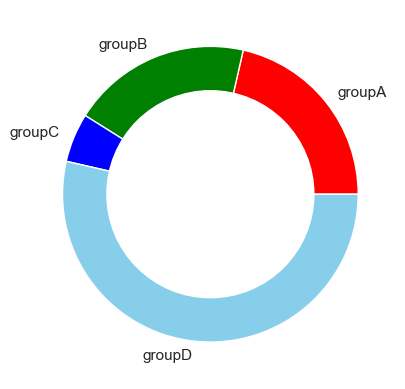

In [53]:
import matplotlib.pyplot as plt
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
# 在中心画一个白色的圆
my_circle=plt.Circle( (0,0), 0.7, color='white')
# 画外围的饼图
plt.pie(size, labels=names, colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

有子分组的甜甜圈图

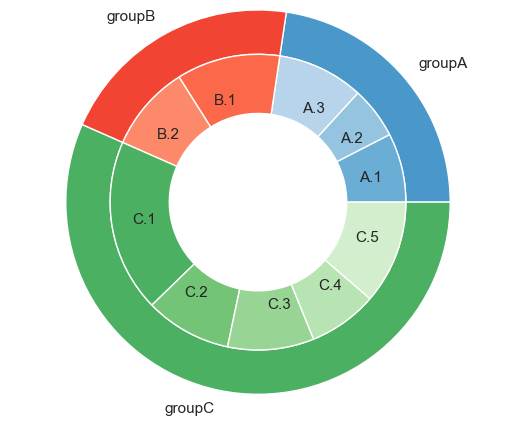

In [54]:
import matplotlib.pyplot as plt
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6),
c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names,
labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5),
c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

文氏图 - Venn diagram

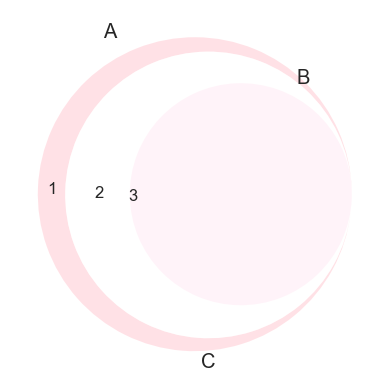

In [55]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn3(subsets=[set([3, 2, 1,4,5,6]),set([2,3,4]),set([1,2,3,4,5])], set_labels=('A',
'B','C'),set_colors = ('lightpink','pink','pink'))

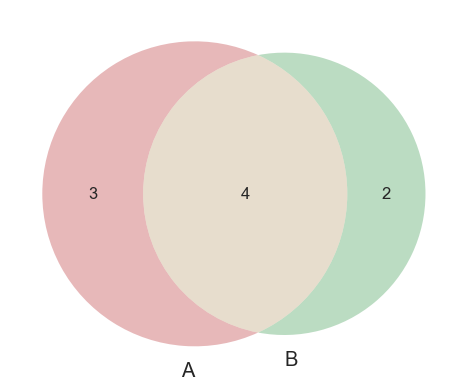

In [56]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn2(subsets=(3, 2,4,1), set_labels=('A', 'B'),set_colors = ('r','g'))

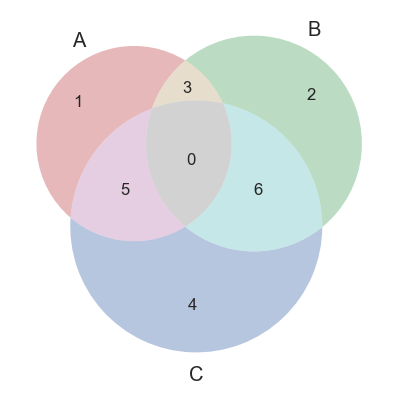

In [57]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
venn3(subsets=(1,2,3,4,5,6,0), set_labels=('A', 'B','C'),set_colors = ('r','g','b'))

树图 - Treemap

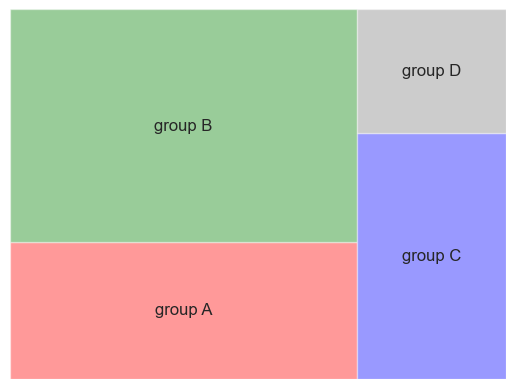

In [58]:
#绘制treemap
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)
# Change color
squarify.plot(sizes=[13,22,10,5], label=["group A", "group B", "group C", "group D"],
color=["red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.show()

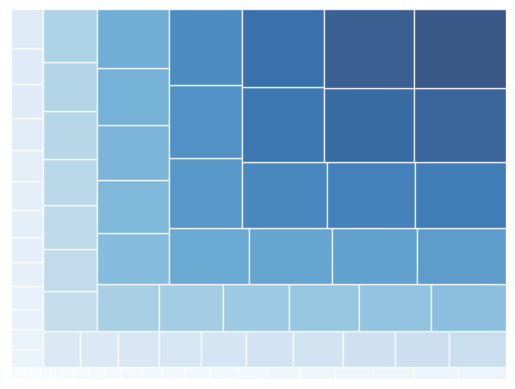

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify # pip install squarify (algorithm for treemap)&lt;/pre&gt;
# Create a dataset:
my_values=[i**3 for i in range(1,100)]
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
# Change color
squarify.plot(sizes=my_values, alpha=.8, color=colors )
plt.axis('off')
plt.show()

matplotlib   
---  


boxplot(X)

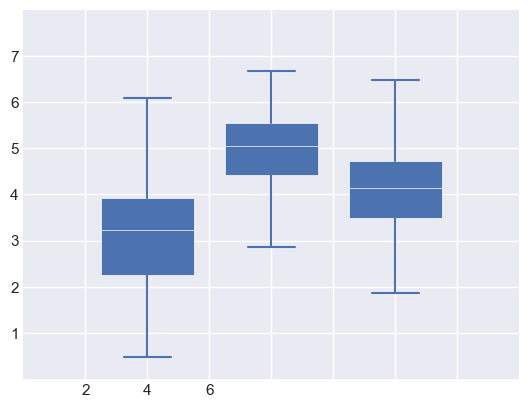

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-darkgrid')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

violinplot(D)

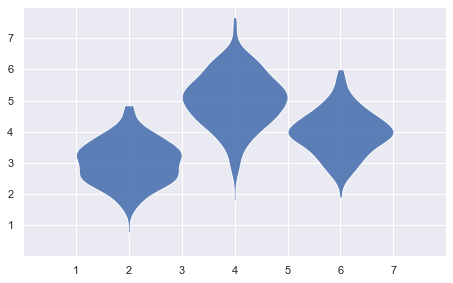

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
%matplotlib inline

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (0.75, 1.00, 0.75), (200, 3))

# plot:
fig, ax = plt.subplots()

vp = ax.violinplot(D, [2, 4, 6], widths=2,
                   showmeans=False, showmedians=False, showextrema=False)
# styling:
for body in vp['bodies']:
    body.set_alpha(0.9)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()

hist(x)

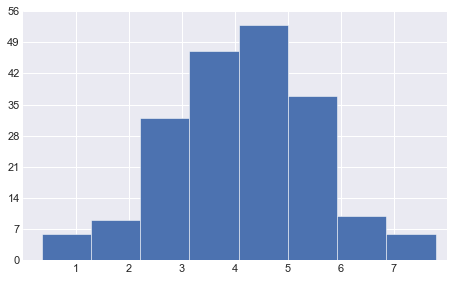

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
%matplotlib inline
# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

pie(x)

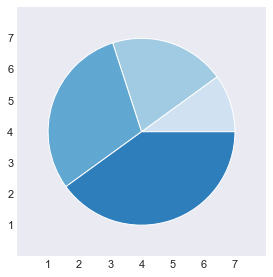

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')
%matplotlib inline

# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

imshow(Z)

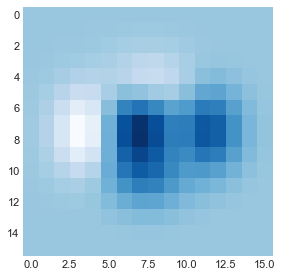

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')
%matplotlib inline
# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 16), np.linspace(-3, 3, 16))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.imshow(Z)

plt.show()

plot(x, y)

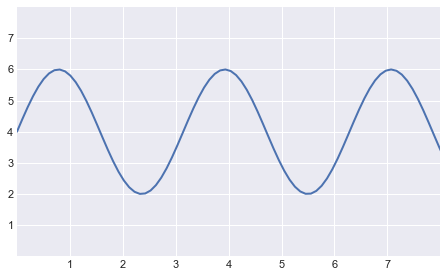

In [65]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
%matplotlib inline
# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

scatter(x, y)

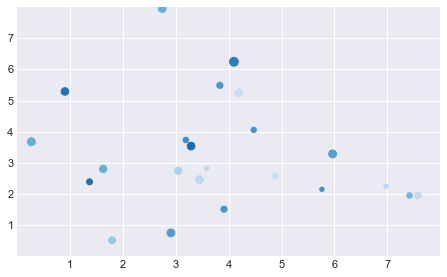

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
%matplotlib inline
# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

bar(x, height) / barh(y, width)

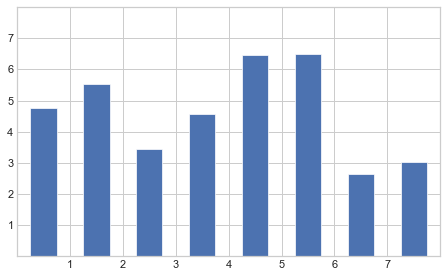

In [92]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')
%matplotlib inline

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=0.5, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

stem(x, y)

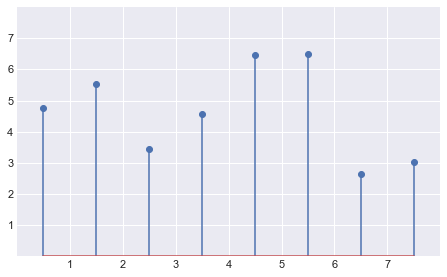

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
%matplotlib inline
# make data
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

fill_between(x, y1, y2)

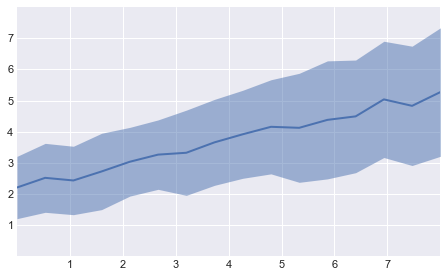

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
%matplotlib inline
# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

seaborn   
----

heartmap

<AxesSubplot:>

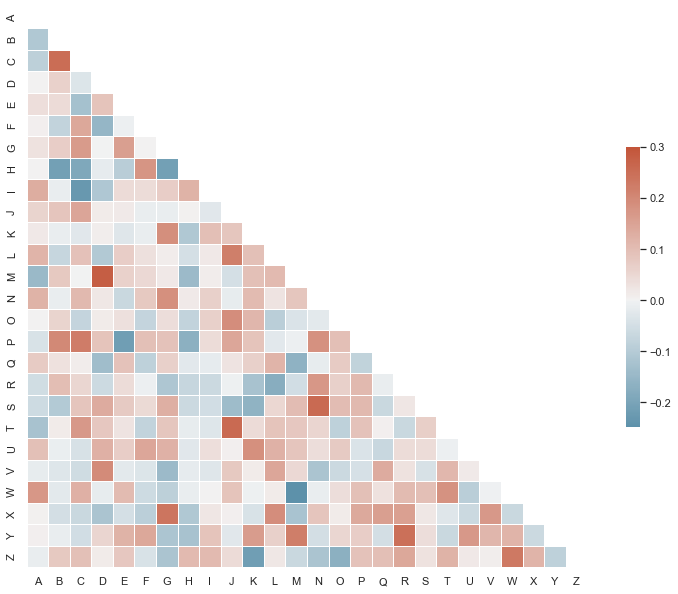

In [70]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

lineplot

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

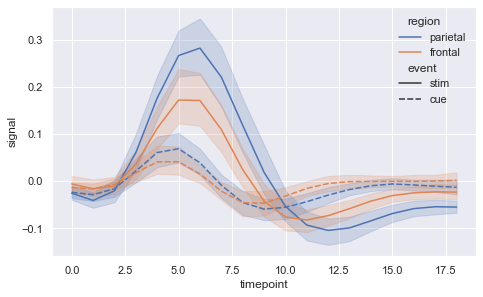

In [71]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

implot

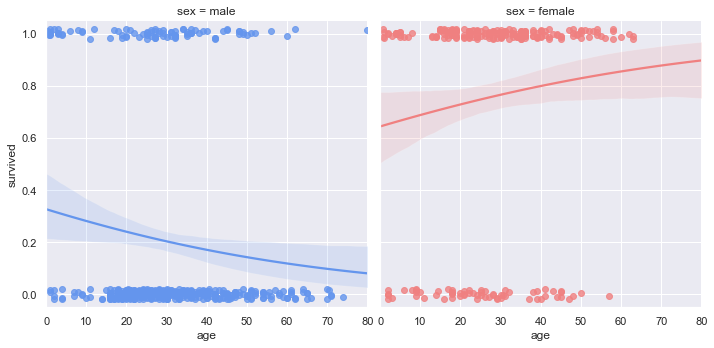

In [72]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load the example Titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered color
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

implot

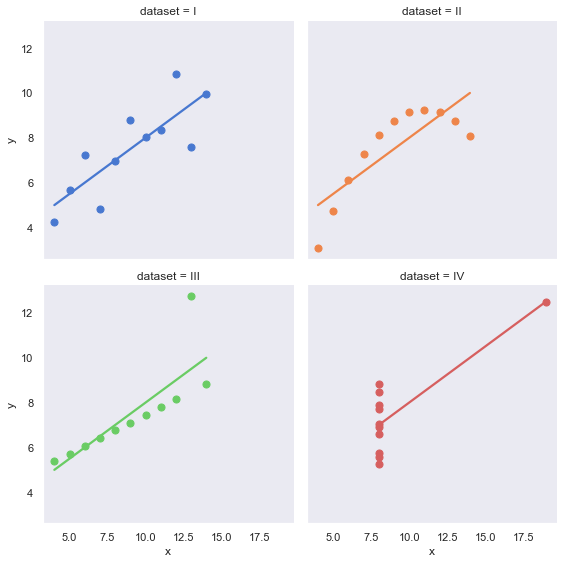

In [73]:
import seaborn as sns
sns.set_theme(style="dark")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

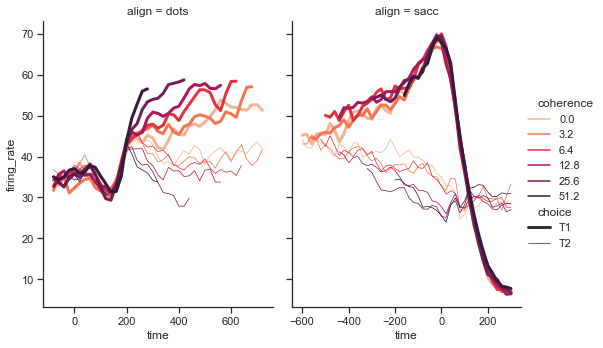

In [74]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

implot


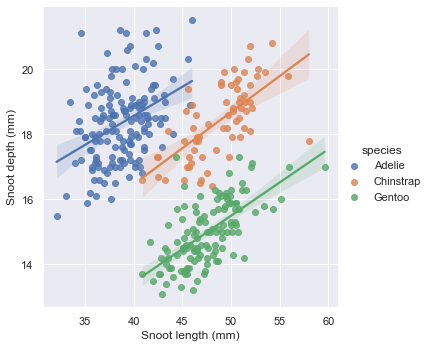

In [75]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

catplot

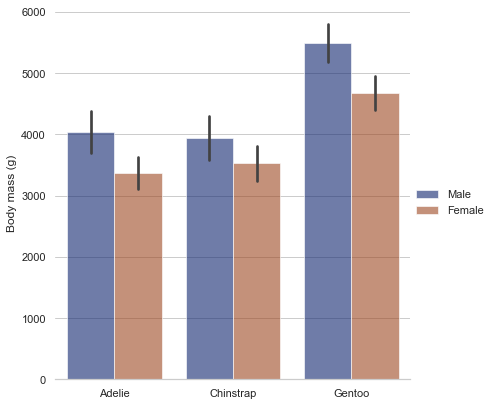

In [93]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

barplot

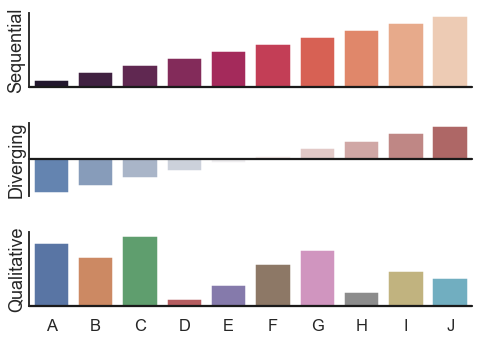

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

Scatterplot Matrix

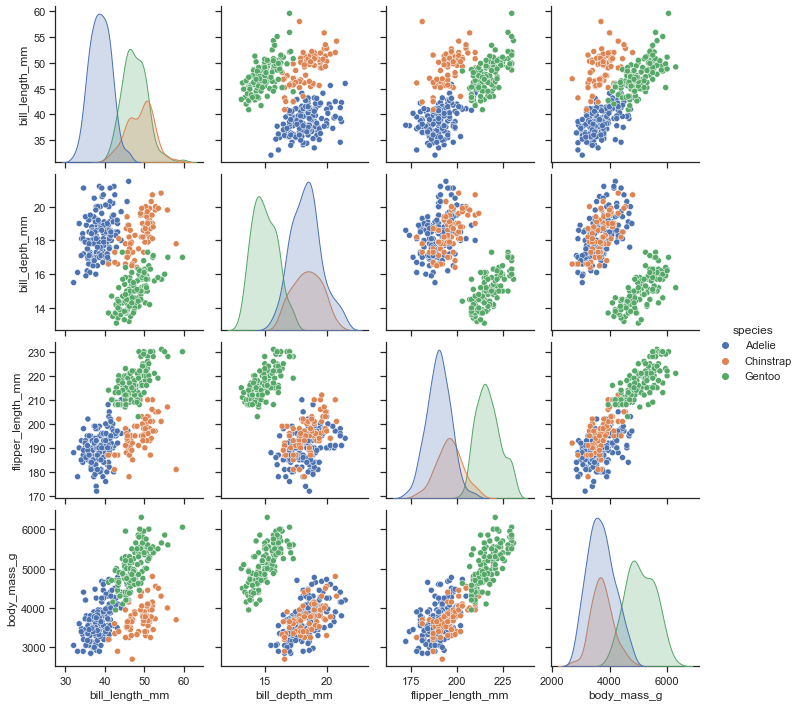

In [77]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

Scatterplot

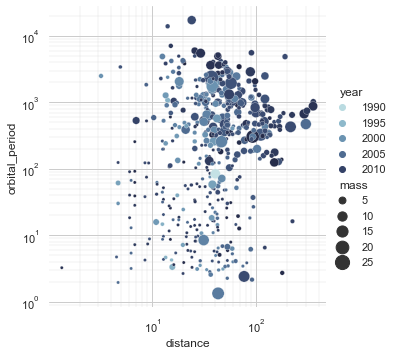

In [78]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

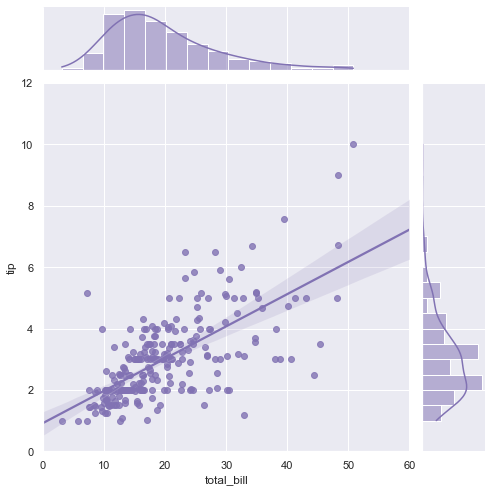

In [79]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

Horizontal bar plots

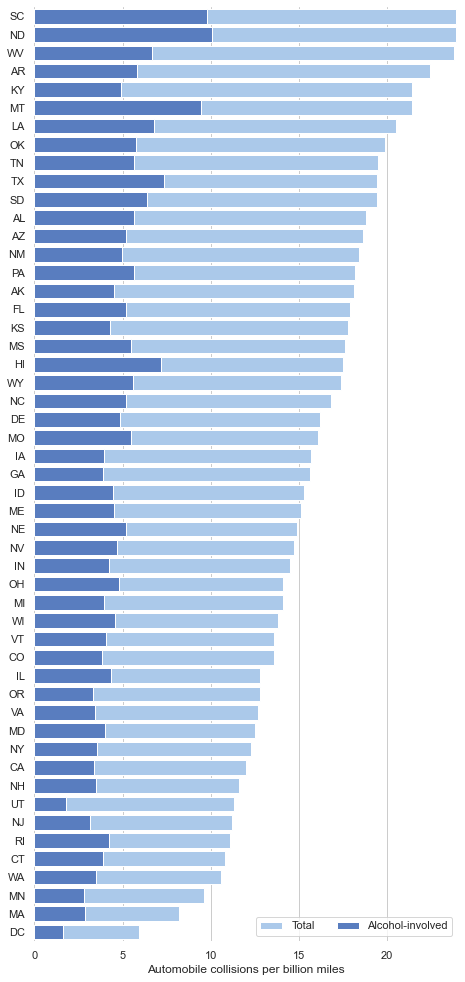

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

KDE plots

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

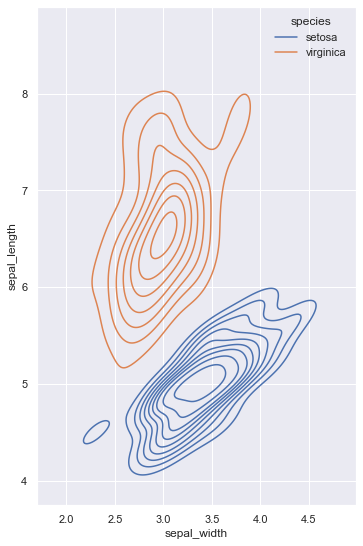

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)